# Analysis National Tourism Promotion

Analysis Objectives:
- **Understand and segment top attracttions, most visited & visitor source** taking into account their visitors and reviews
- **Define a Marketing Plan** according to each cluster formed

Following CRISP DM Process characterize and describe the patterns of visitants of Portuguese attractions and comparing it to Portugal's main tourism competitors. Understand visitor behavior pattern & develope RFM model to segmentize the visitors (RFM analysis is in a separate excel file)

## Data Understanding

### Initial setup and modules/packages loading

In [133]:
# Packages
import os
import numpy as np
import datetime  # date and time handling.
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import joypy
import re
import networkx as nx
import plotly.express as px  # interactive data visualization.
from scipy.spatial.distance import euclidean, cosine  # distance calculation between points.
from mlxtend.frequent_patterns import apriori  # frequent itemset mining algorithm.
from mlxtend.frequent_patterns import association_rules  # association rule mining.
import warnings
from matplotlib.cbook import boxplot_stats
from sklearn.metrics import pairwise_distances
import six
import sys
import squarify
from datetime import datetime
from datetime import timedelta


In [5]:
# Global definitions
baseFolder = os.getcwd()
exportsFolder = baseFolder + os.sep +'Exports' + os.sep

In [2]:
# Standardization of the appearence of the graphics.

subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

## Data Characterization & Description

In [3]:
# Load data 


# Specify the correct encoding 
holidays = pd.read_csv('Holidays.csv', delimiter=';', index_col=None, encoding='UTF-8')

In [4]:
# Load data 

reviews = pd.read_excel('EuropeTop100Attractions_ENG_20190101_20210821.xlsx','Reviews')
attractions = pd.read_excel('EuropeTop100Attractions_ENG_20190101_20210821.xlsx','Attractions')


In [34]:
print(len(reviews))
print(len(attractions))
print(len(holidays))

92120
100
69557


Among the 3 databases, Reviews is the larger with 92120 rows, Holidays has 69557 rows and Holidays is smallest with 100 rows. Let's understand the reviews first

### Data description of 'reviews' & 'attractions' dataset

In [5]:
#get info on reviews dataset

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92120 entries, 0 to 92119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            92120 non-null  object        
 1   extractionDate     92120 non-null  datetime64[ns]
 2   globalRating       92120 non-null  float64       
 3   positionOnRanking  92120 non-null  int64         
 4   sitesOnRanking     92120 non-null  int64         
 5   totalReviews       92120 non-null  int64         
 6   userName           92100 non-null  object        
 7   userLocation       78651 non-null  object        
 8   userContributions  92120 non-null  int64         
 9   tripType           63052 non-null  object        
 10  reviewWritten      92120 non-null  datetime64[ns]
 11  reviewVisited      91410 non-null  datetime64[ns]
 12  reviewRating       92120 non-null  int64         
 13  reviewLanguage     92120 non-null  object        
 14  review

The Reviews data set 92120 rows and 15 columns, being 3 of them datetime type, 1 is a float, 5 are integers and 6 objects.

In [6]:
# Display top 5 rows
reviews.head(5)

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
0,MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi..."
1,MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...
2,MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...
4,MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,2021-07-01,4,en,I visited about 20 years ago and there has bee...


In [12]:


reviews.describe(include='all').T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,92120,100,MAG001,8309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,92120,NaN,NaN,NaN,2021-08-20 22:09:20.598932992,2021-08-20 08:24:40.077000,2021-08-20 12:08:10.831000064,2021-08-20 15:46:58.171000064,2021-08-21 12:35:39.817250048,2021-08-21 16:27:17.026000,NaN
globalRating,92120.0,NaN,NaN,NaN,4.485166,4.0,4.5,4.5,4.5,5.0,0.178085
positionOnRanking,92120.0,NaN,NaN,NaN,3.91459,1.0,1.0,2.0,6.0,55.0,4.843013
sitesOnRanking,92120.0,NaN,NaN,NaN,748.263537,5.0,154.0,484.0,1186.0,3837.0,802.742304
totalReviews,92120.0,NaN,NaN,NaN,40556.601813,5179.0,14152.0,24454.0,51324.0,163828.0,42914.381014
userName,92100,65785,Malgorzata@Margo7850p,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,78651,12612,"London, UK",3710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,92120.0,NaN,NaN,NaN,477.52056,0.0,20.0,66.0,215.0,607732.0,7270.518677
tripType,63052,5,Couples,31702,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We found 5,561 errors in ‘localID’ where ‘genis’ and ‘u’ were mentioned instead of the code. 
After studying the user reviews one by one we identified that the attraction title of ‘genis’ is actually ‘Staromestske namesti’ located at Prug in Czech Republic and ‘u’ is ‘Edinburgh Castle’ in Scotland where the localID will be MAG005 and MAG006 respectively. 
We fixed the error

In [44]:
reviews = reviews.replace('genis', 'MAG005')
reviews = reviews.replace('u', 'MAG006')

reviews = reviews.reset_index(drop=False)
reviews.head(5)

,index,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
0,0,MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi..."
1,1,MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...
2,2,MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...
3,3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...
4,4,MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,2021-07-01,4,en,I visited about 20 years ago and there has bee...


In [18]:
#Check dataset information 
attractions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   localID  100 non-null    object
 1   Name     100 non-null    object
 2   Country  100 non-null    object
 3   ISO      100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


The Attractions dataset has a total of 4 columns and all are object data type and no missing values.

In [19]:
#Display top 15 rows
attractions.head(15)

,localID,Name,Country,ISO
0,MAG001,Basilica of the Sagrada Familia,Spain,ES
1,MAG002,Parc Guell,Spain,ES
2,MAG003,Tower of London,England,UK
3,MAG004,Casa Batllo,Spain,ES
4,MAG005,Staromestske namesti,Czech Republic,CZ
5,MAG006,Edinburgh Castle,Scotland,UK
6,MAG007,Schönbrunn Palace,Austria,AT
7,MAG008,The Alhambra,Spain,ES
8,MAG009,Canal Grande,Italy,IT
9,MAG010,Torre de Belém,Portugal,PT


In [20]:
# Summary statistics for Attractions
attractions.describe(include='all').T

,count,unique,top,freq
localID,100,100,MAG001,1
Name,100,99,Old Town,2
Country,100,26,Spain,17
ISO,100,25,ES,17


In [51]:
attractions = attractions.replace('genis', 'MAG005')
attractions = attractions.replace('u', 'MAG006')

attractions = attractions.reset_index(drop=False)
attractions.head(5)

,index,localID,Name,Country,ISO
0,0,MAG001,Basilica of the Sagrada Familia,Spain,ES
1,1,MAG002,Parc Guell,Spain,ES
2,2,MAG003,Tower of London,England,UK
3,3,MAG004,Casa Batllo,Spain,ES
4,4,MAG005,Staromestske namesti,Czech Republic,CZ


Similar to reviews dataset, in this dataset We found 5,561 errors in ‘ID’ where ‘genis’ and ‘u’ were mentioned instead of the code. We replaced it with the correct codes od MAG005 and MAG006

In [52]:
#Check for duplicates on Attractions
attractions.duplicated().sum()

0

### Merging reviews and attractions datasets as a new dataset 'master_data'

In [53]:
# Change the column name 'ID' as localID to merge with reviews dataset easily.
attractions.rename({'ID':'localID'}, axis=1, inplace=True)

# Merge 'Reviews' and 'Attractions' datasets on 'localID'.
master_data = pd.merge(reviews,
                 attractions[['localID', 'Name', 'Country']],
                 on='localID', 
                 how='left')

In [64]:
# Merged datasets' entries are also 92120. It's correctly merged.
# Reviews dataset has the matching data based on localID from attractions dataset.
# We only have 'Name' and 'Country' columns on purpose from attractions table.
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92120 entries, 0 to 92119
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              92120 non-null  int64         
 1   localID            92120 non-null  object        
 2   extractionDate     92120 non-null  datetime64[ns]
 3   globalRating       92120 non-null  float64       
 4   positionOnRanking  92120 non-null  int64         
 5   sitesOnRanking     92120 non-null  int64         
 6   totalReviews       92120 non-null  int64         
 7   userName           92100 non-null  object        
 8   userLocation       78651 non-null  object        
 9   userContributions  92120 non-null  int64         
 10  tripType           63052 non-null  object        
 11  reviewWritten      92120 non-null  datetime64[ns]
 12  reviewVisited      91410 non-null  string        
 13  reviewRating       92120 non-null  int64         
 14  review

In [55]:
# View merged dataset named master_data. 
master_data.head()

,index,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country
0,0,MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi...",Basilica of the Sagrada Familia,Spain
1,1,MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...,Basilica of the Sagrada Familia,Spain
2,2,MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...,Basilica of the Sagrada Familia,Spain
3,3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,Basilica of the Sagrada Familia,Spain
4,4,MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,2021-07-01,4,en,I visited about 20 years ago and there has bee...,Basilica of the Sagrada Familia,Spain


In [45]:
# Summary stats. of the merged dataset.
master_data.describe(include='all').T 

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,92120,100,MAG001,8309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,92120,NaN,NaN,NaN,2021-08-20 22:09:20.598932992,2021-08-20 08:24:40.077000,2021-08-20 12:08:10.831000064,2021-08-20 15:46:58.171000064,2021-08-21 12:35:39.817250048,2021-08-21 16:27:17.026000,NaN
globalRating,92120.0,NaN,NaN,NaN,4.485166,4.0,4.5,4.5,4.5,5.0,0.178085
positionOnRanking,92120.0,NaN,NaN,NaN,3.91459,1.0,1.0,2.0,6.0,55.0,4.843013
sitesOnRanking,92120.0,NaN,NaN,NaN,748.263537,5.0,154.0,484.0,1186.0,3837.0,802.742304
totalReviews,92120.0,NaN,NaN,NaN,40556.601813,5179.0,14152.0,24454.0,51324.0,163828.0,42914.381014
userName,92100,65785,Malgorzata@Margo7850p,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,78651,12612,"London, UK",3710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,92120.0,NaN,NaN,NaN,477.52056,0.0,20.0,66.0,215.0,607732.0,7270.518677
tripType,63052,5,Couples,31702,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the description of the merged dataset name ‘master_data’ we can understand the following:
•Most popular attraction: Basilica of the Sagrada Familia of Spain (MAG 001) is the most popular attraction with more than 8.3K reviews.
•Top visitor: Malgorzata@Margo7850p is the user with the most reviews (31). There are 65785 unique visitors
•Visitor location: The most no of visitors were from UK (3.7K reviews)


Issues to handle later in this file:
• User location: Visitors were from 12K unique locations as people wrote their location differently (for example some wrote UK, some wrote United Kingdom). 14K people did not mention any location. 
• Outliers: At a first glance, positionOnRanking, sitesOnRanking, totalReviews, and userContributions seem to have outliers due to the discrepancy between 50% and the maximum value registered. The categories extractionDate, userName, and userLocation have a high number of categories/levels
• Missing values: Trip type, user location, name, country, view visited, visit year, visit month, user name has missing values

 

In [77]:
#Detect missing values on Holidays
master_data.isna().sum()

index                    0
localID                  0
extractionDate           0
globalRating             0
positionOnRanking        0
sitesOnRanking           0
totalReviews             0
userName                20
userLocation         13469
userContributions        0
tripType             29068
reviewWritten            0
reviewVisited          710
reviewRating             0
reviewLanguage           0
reviewFullText           0
Name                     0
Country                  0
visit_year             710
visit_month            710
dtype: int64

In [56]:
#Check for duplicates on master_data dataset
master_data.duplicated().sum()

0

### Data description of holidays dataset

In [57]:
#Check dataset information 
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69557 entries, 0 to 69556
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            69557 non-null  int64 
 1   countryOrRegion       69557 non-null  object
 2   holidayName           69557 non-null  object
 3   normalizeHolidayName  69557 non-null  object
 4   isPaidTimeOff         3934 non-null   object
 5   countryRegionCode     64559 non-null  object
 6   date                  69557 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.7+ MB


The Holidays dataset has a total of 7 columns, 6 are objects and 1 is an interger, which is working as an index.

In [73]:
# Summary stats. of holidays
holidays.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HolidayID,69557.0,NaN,NaN,NaN,34778.0,20079.520674,0.0,17389.0,34778.0,52167.0,69556.0
countryOrRegion,69557,38,Sweden,8394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holidayName,69557,483,Søndag,6386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
normalizeHolidayName,69557,438,Søndag,6386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isPaidTimeOff,3934,2,True,2695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
countryRegionCode,64559,34,SE,8394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,69557,20665,2001-01-01,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
holidays.rename(columns={'Unnamed: 0': 'HolidayID'}, inplace=True)

In this dataset, we have a column named "Unnamed:0" which is the only integer on the Holidays dataset and is working as an index of sorts. We changed the column name to "HolidayID".

In [68]:
holidays.head()

,HolidayID,countryOrRegion,holidayName,normalizeHolidayName,isPaidTimeOff,countryRegionCode,date
0,0,Argentina,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day],NaN,AR,1970-01-01
1,1,Australia,New Year's Day,New Year's Day,NaN,AU,1970-01-01
2,2,Austria,Neujahr,Neujahr,NaN,AT,1970-01-01
3,3,Belgium,Nieuwjaarsdag,Nieuwjaarsdag,NaN,BE,1970-01-01
4,4,Brazil,Ano novo,Ano novo,NaN,BR,1970-01-01


In [67]:
#Detect missing values on Holidays
holidays.isna().sum()

HolidayID                   0
countryOrRegion             0
holidayName                 0
normalizeHolidayName        0
isPaidTimeOff           65623
countryRegionCode        4998
date                        0
dtype: int64

There are missing values on isPaidTimeOff and countryRegionCode on the Holidays dataset.


In [69]:
holidays.duplicated().sum()

0

## Data Cleaning of master_data dataset & holidays dataset

### First we detect the outliers through visualization

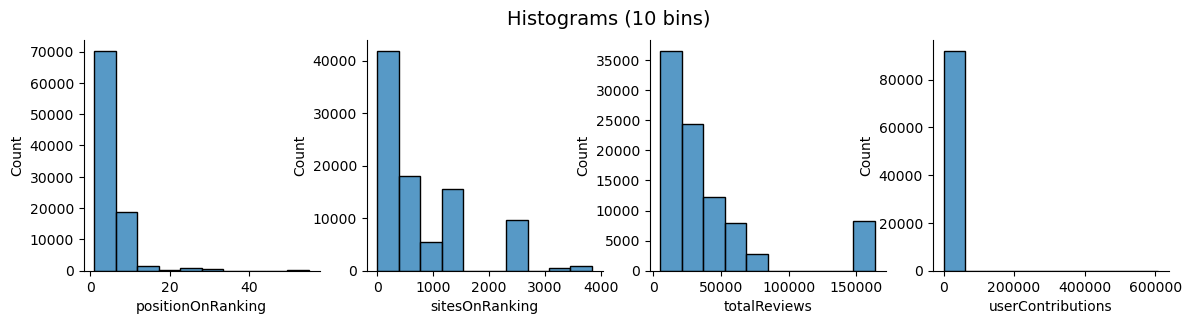

In [75]:
# Identify numeric variables of the columns where we suspect to be Outliers
numerical=['positionOnRanking', 'sitesOnRanking', 'totalReviews', 'userContributions']

# Draw
fig, ax = plt.subplots(1, 4, figsize=(14,3))
for var, subplot in zip(master_data[numerical], ax.flatten()):
    g = sns.histplot(data=master_data,
                bins=10,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms (10 bins)", fontsize=plots_Title_fontSize);

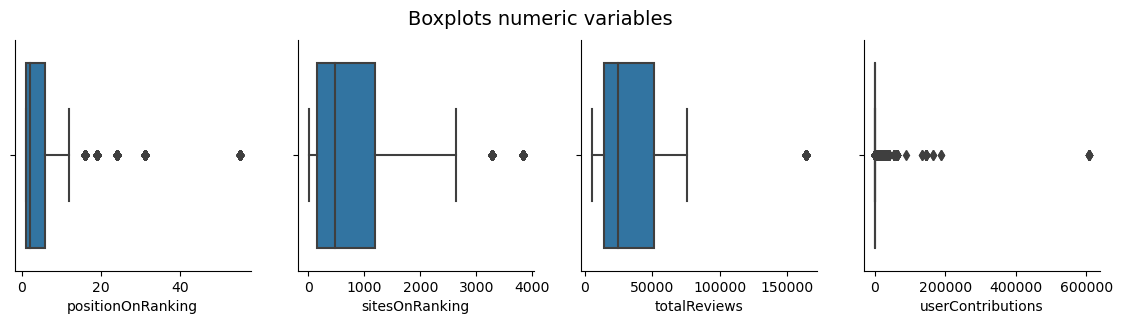

In [76]:
# BOXPLOT of the 4 categories
# Draw
fig, ax = plt.subplots(1, 4, figsize=(14,3))
for var, subplot in zip(master_data[numerical], ax.flatten()):
    g = sns.boxplot(data=master_data,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots numeric variables", fontsize=plots_Title_fontSize);

Based on the distribution, we can see there are outliers in these four variables. We took a deeper understanding of what value these columns may bring if we keep it in the report. After the analysis we have dropped these four columns along with four other columns that we do not need for analysis. The dropped columns are 'extractionDate', 'positionOnRanking', 'sitesOnRanking', 'reviewLanguage', ‘reviewFullText', 'userContributions', globalRating', ‘totalReviews'. We created a new dataset master_cleaned.

In [60]:
# Drop the columns we don't need for now.
master_cleaned = master_data.drop(['extractionDate', 
                                   'positionOnRanking',
                                   'sitesOnRanking',  
                                   'reviewLanguage',
                                   'reviewFullText',
                                   'userContributions', 
                                   'globalRating',
                                   'totalReviews'], axis=1)

### We create a new dataset after getting rid of redundant columns

In [116]:
# Change the dtype of reviewVisited date column to String.
master_data['reviewVisited'] = master_data['reviewVisited'].astype('string')

# Split reviewVisited date column by year and month.
master_data['visit_year']  = master_data['reviewVisited'].str.split('-').str[0]
master_data['visit_month'] = master_data['reviewVisited'].str.split('-').str[1]

In [61]:
# View correclty dropped dataset.
master_cleaned.head(10)

,index,localID,userName,userLocation,tripType,reviewWritten,reviewVisited,reviewRating,Name,Country,visit_year,visit_month
0,0,MAG001,Maurice M@MauriceM171,"Indianapolis, IN",Couples,2021-08-18,2021-08-01,5,Basilica of the Sagrada Familia,Spain,2021,08
1,1,MAG001,nickchamb@nickchamb,"Bandon, Ireland",Couples,2021-08-17,2021-03-01,5,Basilica of the Sagrada Familia,Spain,2021,03
2,2,MAG001,Arthur Villon@arthur4588,"Valencia, Spain",Friends,2021-08-16,2021-08-01,5,Basilica of the Sagrada Familia,Spain,2021,08
3,3,MAG001,James U@696jamesu,NaN,NaN,2021-08-16,2021-07-01,5,Basilica of the Sagrada Familia,Spain,2021,07
4,4,MAG001,Kamal K Sirra@Sirra63,"Madrid, Spain",Family,2021-08-15,2021-07-01,4,Basilica of the Sagrada Familia,Spain,2021,07
5,5,MAG001,paul n@pauln3630,"Towaco, NJ",NaN,2021-08-15,2021-08-01,3,Basilica of the Sagrada Familia,Spain,2021,08
6,6,MAG001,Edwin R@edwinrL7667XX,NaN,NaN,2021-08-14,2021-08-01,5,Basilica of the Sagrada Familia,Spain,2021,08
7,7,MAG001,quincy2008@quincy2008,"Barnsley, UK",Family,2021-08-12,2021-07-01,4,Basilica of the Sagrada Familia,Spain,2021,07
8,8,MAG001,Elanita@Elanita,"Sofiyivska Borschagivka, Ukraine",Friends,2021-08-11,2021-08-01,5,Basilica of the Sagrada Familia,Spain,2021,08
9,9,MAG001,Susan A@C9769QCsusana,NaN,NaN,2021-08-11,2021-08-01,5,Basilica of the Sagrada Familia,Spain,2021,08


In [124]:
#Checking our missing value in username
master_cleaned[master_cleaned['userName'].isna()]

,index,localID,userName,userLocation,tripType,reviewWritten,reviewVisited,reviewRating,Name,Country,visit_year,visit_month,userLocation_cleaned


In [ ]:
The missing userNames reviews are for two Attractions only: Staromestske namesti and Krakow's Rynek Glowny Central Square.

Specifically the ones for Kakrow were all created within 2 days (15th and 16th Jan 2019). The reviews for Staromestske were created over the course of a week (between the 10th and 17th March 2019).

These reviews could have been created by bots. And, since they are a small percentage of our total reviews (0,000217108119844), we will remove them to continue the data cleanup.

In [62]:
#Remove "NaN" userName from the database
master_cleaned = master_cleaned.dropna(subset=['userName'])

In [79]:
# Check Missing values in the Dataset and print the Percentage for Missing Values for Each Columns.
count = master_cleaned.isnull().sum().sort_values(ascending=False)
percentage = ((master_cleaned.isnull().sum()/len(master_cleaned)*100)).sort_values(ascending=False)
missing_data = pd.concat([count,percentage],axis=1,
keys = ['Count', 'Percentage'])

print('Count and percantage of missing values for the columns:')

missing_data


Count and percantage of missing values for the columns:


,Count,Percentage
tripType,29048,31.539631
userLocation,13449,14.602606
reviewVisited,690,0.749186
visit_year,690,0.749186
visit_month,690,0.749186
index,0,0.000000
localID,0,0.000000
userName,0,0.000000
reviewWritten,0,0.000000
reviewRating,0,0.000000


### Now we address UserLocation Issues

In [80]:
# Check User Location cardinality
master_cleaned['userLocation'].value_counts().head(60)
                                    

userLocation
London, UK                     3710
Melbourne, Australia            773
Sydney, Australia               736
New York City, NY               699
Toronto, Canada                 567
Edinburgh, UK                   552
Manchester, UK                  543
Singapore, Singapore            502
Liverpool, UK                   446
Dublin, Ireland                 414
Bristol, UK                     400
Los Angeles, CA                 395
Birmingham, UK                  386
United Kingdom                  361
Barcelona, Spain                359
Glasgow, UK                     355
Brisbane, Australia             344
Chicago, IL                     331
Perth, Australia                330
Athens, Greece                  303
Dubai, United Arab Emirates     299
Boston, MA                      280
Bucharest, Romania              268
Hong Kong, China                267
San Francisco, CA               254
Leeds, UK                       252
Atlanta, GA                     252
Mumbai, India  

The userLocation column has irregular data. Some users type their city, others the Continent, others the street name, city, country.

13448 have not inserted anything on the userLocation

In [57]:
# Geopy is a Python library that provides geocoding and reverse geocoding functionality.
!python -m pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------- ----------------------------- 10.2/40.3 kB ? eta -:--:--
     ---------------------------- --------- 30.7/40.3 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 40.3/40.3 kB 485.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 125.4/125.4 kB 3.7 MB/s eta 0:00:00


In [93]:
master_cleaned['userLocation'] = ['unknown' if pd.isna(x) else x for x in master_cleaned['userLocation']]

#We are filling null values with 'unknown' as the user location

In [96]:
from geopy.geocoders import Nominatim
count=0
for attraction in master_cleaned[master_cleaned.userLocation.notna()].userLocation.unique():
    count+=1
    #attraction = attraction.userLocation.strip()
    
    split_userLocation = "userLocation".split(", ")
    # we split the string at the position where we have ", "
    # by splitting the string we create a list of n elements (n+1) where n is how many times we saw ", "
    if len(split_userLocation)>1:
        place = split_userLocation[-1]
        print(count, attraction, " -> ", place)
    else:
        # otherwise we try to locate the userLocation using a third-party api
        # 
        try:
            geolocator = Nominatim(user_agent="locator_app")
            location = geolocator.geocode(attraction.strip(), language="en")
            split_location = location.raw.get("display_name").split(", ")
            # "display_name" might be something like "32 rua, Barcelona, Spain"
            place = split_location[-1]
            print(count, attraction, " -> ", place)
        except Exception as e:
            print("attraction ", attraction, e)
            continue
            
    for i in master_cleaned[(master_cleaned.userLocation==attraction)].index.tolist():
        master_cleaned.at[i,"userLocation_cleaned"] = place

1 United States  ->  United States
2 Ireland  ->  Ireland
3 Spain  ->  Spain
4 unknown  ->  Bahamas
5 United Kingdom  ->  United Kingdom
6 France  ->  France
7 Switzerland  ->  Switzerland
8 Greece  ->  Greece
9 Netherlands  ->  Netherlands
10 Poland  ->  Poland
11 Canada  ->  Canada
12 Germany  ->  Germany
13 Italy  ->  Italy
14 Costa Rica  ->  Costa Rica
15 Norway  ->  Norway
16 South Africa  ->  South Africa
17 Croatia  ->  Croatia
18 Estonia  ->  Estonia
19 Mexico  ->  Mexico
20 India  ->  India
21 Australia  ->  Australia
22 Luxembourg  ->  Luxembourg
23 Egypt  ->  Egypt
24 Malaysia  ->  Malaysia
25 Slovenia  ->  Slovenia
26 Thailand  ->  Thailand
27 Belgium  ->  Belgium
28 China  ->  China
29 Indonesia  ->  Indonesia
30 Brazil  ->  Brazil


In [98]:
# Check if it's correclty implemented
# Use the "loc" method to get specific columns
columns = ['userLocation', 'userLocation_cleaned']
master_cleaned.loc[:, columns]

,userLocation,userLocation_cleaned
0,United States,United States
1,Ireland,Ireland
2,Spain,Spain
3,unknown,Bahamas
4,Spain,Spain
...,...,...
92115,United Kingdom,United Kingdom
92116,unknown,Bahamas
92117,unknown,Bahamas
92118,unknown,Bahamas


In [112]:
#check out if missing values in user location is sorted 
master_cleaned.isna().sum()

index                       0
localID                     0
userName                    0
userLocation                0
tripType                29048
reviewWritten               0
reviewVisited               0
reviewRating                0
Name                        0
Country                     0
visit_year                  0
visit_month                 0
userLocation_cleaned        0
dtype: int64

The user location issues are now sorted. Now we will fix the review written, visit year and month columns

There are 22 reviews which were written before the visitation date/time.

In [121]:
# Changing the NaN to Unknown on reviewVisited, visit_year, visit_month
master_cleaned['reviewVisited'] = ['Unknown' if pd.isna(x) else x for x in master_cleaned['reviewVisited']]


In [123]:
#Confirm there are no more reviewVisited, visit year and visit_month missing values
master_cleaned.isna().sum()

index                       0
localID                     0
userName                    0
userLocation                0
tripType                29048
reviewWritten               0
reviewVisited               0
reviewRating                0
Name                        0
Country                     0
visit_year                  0
visit_month                 0
userLocation_cleaned        0
dtype: int64

now it's time to focus on fixing the missing values of Trip type

In [126]:
# Changing the NaN to Unknown on tripType
master_cleaned['tripType'] = ['Unknown' if pd.isna(x) else x for x in master_cleaned['tripType']]

In [127]:
#Confirm there are no more missing values in the master_cleaned dataset
master_cleaned.isna().sum()

index                   0
localID                 0
userName                0
userLocation            0
tripType                0
reviewWritten           0
reviewVisited           0
reviewRating            0
Name                    0
Country                 0
visit_year              0
visit_month             0
userLocation_cleaned    0
dtype: int64

### Now it's time to clean up the holidays dataset


In [128]:
holidays.head()

,HolidayID,countryOrRegion,holidayName,normalizeHolidayName,isPaidTimeOff,countryRegionCode,date
0,0,Argentina,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day],NaN,AR,1970-01-01
1,1,Australia,New Year's Day,New Year's Day,NaN,AU,1970-01-01
2,2,Austria,Neujahr,Neujahr,NaN,AT,1970-01-01
3,3,Belgium,Nieuwjaarsdag,Nieuwjaarsdag,NaN,BE,1970-01-01
4,4,Brazil,Ano novo,Ano novo,NaN,BR,1970-01-01


In [129]:
holidays["countryOrRegion"].drop_duplicates().count()

38

There are 38 countries on the Holidays dataset.

In [130]:
holidays.shape[0]

69557

There are 69557 Holidays in the dataset.

In [136]:
holidays['date'] = pd.to_datetime(holidays['date'], format='%Y-%m-%d')


In [138]:
holidays.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
HolidayID,69557.0,NaN,NaN,NaN,34778.0,0.0,17389.0,34778.0,52167.0,69556.0,20079.520674
countryOrRegion,69557,38,Sweden,8394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holidayName,69557,483,Søndag,6386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
normalizeHolidayName,69557,438,Søndag,6386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isPaidTimeOff,3934,2,True,2695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
countryRegionCode,64559,34,SE,8394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,69557,NaN,NaN,NaN,2035-09-01 05:03:55.956122368,1970-01-01 00:00:00,2004-05-01 00:00:00,2035-12-26 00:00:00,2067-05-08 00:00:00,2098-12-28 00:00:00,NaN


The first Holiday on the dataset is from 1970 (New Years).

The last is in 2098, 28th December.

Søndag is the most frequent holiday and it correspondend to a Swedish bank holiday.

There are 38 different "countryOrRegion" and 34 "countryRegionCode" which we will look into to understand if there are missing information

From data understand we know, there is a staggering number of missing values on "isPaidTimeOff", which will be updated to "Uknown" for the analysis.

AttributeError: 'DataFrame' object has no attribute 'Country'

In [139]:
# Changing the NaN to Unknown on isPaidTimeOff
holidays['isPaidTimeOff'] = ['Unknown' if pd.isna(x) else x for x in holidays['isPaidTimeOff']]

In [140]:
#Confirm there are no more isPaidTimeOff missing values
holidays.isna().sum()

HolidayID                  0
countryOrRegion            0
holidayName                0
normalizeHolidayName       0
isPaidTimeOff              0
countryRegionCode       4998
date                       0
dtype: int64

In [141]:
#Check what are the values in the "countryRegionCode" that are missing.
holidays.loc[holidays["countryRegionCode"].isna(), ["countryOrRegion", "countryRegionCode", "holidayName"]]

,countryOrRegion,countryRegionCode,holidayName
28,Scotland,NaN,New Year Holiday
72,Northern Ireland,NaN,St. Patrick's Day
92,England,NaN,Good Friday
97,Northern Ireland,NaN,Good Friday
100,Scotland,NaN,Good Friday
...,...,...,...
69530,Wales,NaN,Christmas Day
69537,England,NaN,Boxing Day
69546,Northern Ireland,NaN,Boxing Day
69549,Scotland,NaN,Boxing Day


Making it easier to understand, and since they are almost 5K missing values, we will group them missing values by country/region.

In [142]:
holidays.groupby(["countryOrRegion"])["countryRegionCode"].apply(lambda x: x.isnull().sum()).sort_values(ascending = False)

countryOrRegion
Northern Ireland    1429
Scotland            1301
Wales               1134
England             1134
Netherlands            0
New Zealand            0
Norway                 0
Poland                 0
Portugal               0
Slovenia               0
Japan                  0
South Africa           0
Spain                  0
Sweden                 0
Switzerland            0
Ukraine                0
United Kingdom         0
United States          0
Mexico                 0
Argentina              0
Australia              0
Isle of Man            0
Austria                0
Belarus                0
Belgium                0
Brazil                 0
Canada                 0
Colombia               0
Croatia                0
Czech                  0
Denmark                0
Finland                0
France                 0
Germany                0
Hungary                0
India                  0
Ireland                0
Italy                  0
Name: countryRegionCode, dtype: in

All the missing information is resumed in 4 countries:

Northern Ireland = 1429 | Scotland = 1301 | Wales = 1134 | England = 1134

Since they are all part of United Kingdom, we will update their "countryRegionCode" to UK.

In [143]:
#Filling the missing values with UK.
holidays["countryRegionCode"].fillna("UK", inplace = True)

In [144]:
#Check if there is a GB countryRegionCode
holidays[holidays['countryRegionCode'].str.contains('GB')].count()

HolidayID               1853
countryOrRegion         1853
holidayName             1853
normalizeHolidayName    1853
isPaidTimeOff           1853
countryRegionCode       1853
date                    1853
dtype: int64

Althought there are 1853 rows with Holidays information for GB, we decided not to merge them with the UK since they are indeed two separate political regions with separate holidays.

In [145]:
#Confirm there are no more missing values on the Holidays dataset
holidays.isna().sum()

HolidayID               0
countryOrRegion         0
holidayName             0
normalizeHolidayName    0
isPaidTimeOff           0
countryRegionCode       0
date                    0
dtype: int64

In [146]:
#Since the 'countryRegionCode' is same as ISO code, we will rename the column to make it easier to understand.

holidays=holidays.rename(columns={"countryRegionCode":"ISO"})
holidays.head(5)

,HolidayID,countryOrRegion,holidayName,normalizeHolidayName,isPaidTimeOff,ISO,date
0,0,Argentina,Año Nuevo [New Year's Day],Año Nuevo [New Year's Day],Unknown,AR,1970-01-01
1,1,Australia,New Year's Day,New Year's Day,Unknown,AU,1970-01-01
2,2,Austria,Neujahr,Neujahr,Unknown,AT,1970-01-01
3,3,Belgium,Nieuwjaarsdag,Nieuwjaarsdag,Unknown,BE,1970-01-01
4,4,Brazil,Ano novo,Ano novo,Unknown,BR,1970-01-01



After cleaning the missing values, we will normalize the data in order to facilitate the analysis.

For that reasons, we will use the 'normalizeHolidayName' column as a base, which should give us a more "standard" Holiday name, making it easier to process on data visualization.

As such, the column "holidayName" is not needed. We will remove it from the dataset and rename 'normalizeHolidayName' to 'holidayName'.

In [162]:

    holidays = holidays.rename(columns={"normalizeHolidayName": "HolidayName"})


In [163]:
holidays.head(5)

,HolidayID,countryOrRegion,HolidayName,isPaidTimeOff,ISO,date
0,0,Argentina,Año Nuevo [New Year's Day],Unknown,AR,1970-01-01
1,1,Australia,New Year's Day,Unknown,AU,1970-01-01
2,2,Austria,Neujahr,Unknown,AT,1970-01-01
3,3,Belgium,Nieuwjaarsdag,Unknown,BE,1970-01-01
4,4,Brazil,Ano novo,Unknown,BR,1970-01-01


In [164]:
holidays['HolidayName'].value_counts()

HolidayName
Søndag                                  6386
Söndag                                  6335
Christmas Day                           1955
New Year's Day                          1899
Boxing Day                              1633
                                        ... 
Helatorstai, Vappu                         1
Dag van de Arbeid, O.L.H. Hemelvaart       1
Reformationstag                            1
Bevrijdingsdag, Hemelvaart                 1
День праці, Пасха (Великдень)              1
Name: count, Length: 438, dtype: int64

Similar to the "userLocation" on the Reviews dataset, this column has information divided by commas and it can be cleaned up better to make it easier to obtain information.

For example, Bevrijdingsdag is the Liberation Day in Holand (May 4th) and Hemelvaartsdag is "Ascension Day" which is a moving holiday. We will then split the information separated by "," before we can group them by Holiday Festivity.

In [166]:
holidays = holidays.assign(HolidayName=holidays.HolidayName.str.split(",")).explode("HolidayName")
holidays

,HolidayID,countryOrRegion,HolidayName,isPaidTimeOff,ISO,date
0,0,Argentina,Año Nuevo [New Year's Day],Unknown,AR,1970-01-01
1,1,Australia,New Year's Day,Unknown,AU,1970-01-01
2,2,Austria,Neujahr,Unknown,AT,1970-01-01
3,3,Belgium,Nieuwjaarsdag,Unknown,BE,1970-01-01
4,4,Brazil,Ano novo,Unknown,BR,1970-01-01
...,...,...,...,...,...,...
69552,69552,Sweden,Annandag jul,Unknown,SE,2098-12-26
69553,69553,United Kingdom,Boxing Day,True,GB,2098-12-26
69554,69554,Wales,Boxing Day,Unknown,UK,2098-12-26
69555,69555,Norway,Søndag,Unknown,NO,2098-12-28


We will try to minimize any error by removing extra blank spaces and put all holidays with lowercase.

In [168]:
#Check how many unique Holidays we have before the normalization
holidays['HolidayName'].nunique()

422

In [169]:
#Removing extra blank spaces
holidays['HolidayName'] = holidays['HolidayName'].str.strip()
holidays

,HolidayID,countryOrRegion,HolidayName,isPaidTimeOff,ISO,date
0,0,Argentina,Año Nuevo [New Year's Day],Unknown,AR,1970-01-01
1,1,Australia,New Year's Day,Unknown,AU,1970-01-01
2,2,Austria,Neujahr,Unknown,AT,1970-01-01
3,3,Belgium,Nieuwjaarsdag,Unknown,BE,1970-01-01
4,4,Brazil,Ano novo,Unknown,BR,1970-01-01
...,...,...,...,...,...,...
69552,69552,Sweden,Annandag jul,Unknown,SE,2098-12-26
69553,69553,United Kingdom,Boxing Day,True,GB,2098-12-26
69554,69554,Wales,Boxing Day,Unknown,UK,2098-12-26
69555,69555,Norway,Søndag,Unknown,NO,2098-12-28


In [170]:
#Check how many unique Holidays we have after removing extra blank spaces
holidays['HolidayName'].nunique()

386

In [172]:
#Change all 'HolidayName' to lowercase
holidays['HolidayName'] = holidays['HolidayName'].str.lower()

In [173]:
#Check how many unique Holidays we have after the lowercase
holidays['HolidayName'].nunique()

384

With this data normalization done, we will now group the holidays per day. For e.g. HolidayID 69553 is BoxingDay in the UK which is the same celebration as the HolidayID 69554 in Wales.

For the project purpose we will want to look at clusters and unique Holidays, hence why the grouping the Holiday with the Date will make it easier

In [174]:
holidays['month_day'] = holidays['date'].dt.strftime('%m-%d')
holidays['month_day'].nunique()

366

In [176]:
Unique_Holidays = holidays.groupby(['month_day'])['HolidayName'].value_counts()

#Creating a new pandas dataframe for the Unique_Holidays
pd.DataFrame(Unique_Holidays)

count
month_day HolidayName                      
01-01     new year's day               1520
          año nuevo [new year's day]    350
          ano novo                      258
          nieuwjaarsdag                 258
          neujahr                       237
...                                     ...
12-31     søndag                         18
          söndag                         18
          szilveszter                    12
          millennium celebrations         6
          y2k changeover                  1

[4210 rows x 1 columns]

We can see that there are several holidays that take place in the same day and actually reffer to the same celebration, such as New Year's Day / Ano Novo / Neujahr or Söndag / Søndag.

It time to normalize this information

In [177]:
# søndag = söndag
holidays['HolidayName'] = np.where(holidays['HolidayName']=='söndag','søndag',holidays['HolidayName'])

# año nuevo [new year's day] = new year's day
holidays['HolidayName'] = np.where(holidays['HolidayName']=="año nuevo [new year's day]", "new year's day",holidays['HolidayName'])

#nieuwjaarsdag = new year's day
holidays['HolidayName'] = np.where(holidays['HolidayName']=="nieuwjaarsdag", "new year's day",holidays['HolidayName'])

#ano novo = new year's day
holidays['HolidayName'] = np.where(holidays['HolidayName']=="ano novo", "new year's day",holidays['HolidayName'])

#neujahr = new year's day
holidays['HolidayName'] = np.where(holidays['HolidayName']=="neujahr", "new year's day",holidays['HolidayName'])


In [178]:
holidays['HolidayName'].nunique()

379

In [180]:
holidays.duplicated().sum()

0

In [181]:
Holidays_grouped = holidays.groupby(['ISO', 'date'])['HolidayID'].count()
Holidays_grouped

ISO  date      
AR   1970-01-01    1
     1970-02-09    1
     1970-02-10    1
     1970-03-24    1
     1970-03-26    1
                  ..
ZA   2098-08-09    1
     2098-09-24    1
     2098-12-16    1
     2098-12-25    1
     2098-12-26    1
Name: HolidayID, Length: 66412, dtype: int64

In [182]:
holidays["HolidayName"].value_counts()

HolidayName
søndag                    13462
new year's day             3075
christmas day              1969
boxing day                 1633
good friday                1290
                          ...  
new zealand day               3
by presidential decree        2
reformationstag               1
天皇の即位の日                       1
即位礼正殿の儀が行われる日                 1
Name: count, Length: 379, dtype: int64

Søndag is the most frequent holiday. However it is not a holiday, it stands for sunday in norwegean and swedish. After some Google research, we concluded that it is a celebration day but not a public holiday.

For this reason we will remove the søndag.

In [183]:
holidays = holidays[holidays["HolidayName"].str.contains("søndag") == False]

In [184]:
holidays["HolidayName"].value_counts()

HolidayName
new year's day            3075
christmas day             1969
boxing day                1633
good friday               1290
easter monday             1042
                          ... 
new zealand day              3
by presidential decree       2
reformationstag              1
天皇の即位の日                      1
即位礼正殿の儀が行われる日                1
Name: count, Length: 377, dtype: int64

From here we divided holidays by Moving holiday and Fixed holiday since it can be relevant for marketing strategies and campaigns. To do so, we added an extra column: TypeHoliday

In [185]:
len(holidays['date'].dt.year.drop_duplicates())

129

In [199]:
Fixed_Holidays = list(pd.DataFrame(holidays[['ISO','HolidayName','month_day']].value_counts()\
            [holidays[['ISO','HolidayName','month_day']].value_counts()==129]).reset_index()['HolidayName'])

In [208]:
holidays['TypeHoliday'].value_counts()

TypeHoliday
MovingDay    29059
FixedDay     27806
Name: count, dtype: int64

we have completed the data cleaning & preparation of holidays dataset

 ### DATA EXPLORATION - Understanding what is happending to Portugese Attractions & Identifying competition

In [39]:
# Take the rows where 'userLocation' and 'TripType' is not NaN.
master_cleaned = master_cleaned[master_cleaned['Name'].notna()] 
master_cleaned = master_cleaned[master_cleaned['reviewVisited'].notna()]  

In [201]:
# Filter the country as Portugal. 
countries = ['Portugal']
master_portugal = master_cleaned[master_cleaned.Country.isin(countries)]

In [202]:
# Check unique values in Country column to make sure.
master_portugal.Country.unique()

array(['Portugal'], dtype=object)

In [203]:
# Review the Attractions in Portugal Cardinality by their names in descending order 
master_portugal['Name'].value_counts()[:20].sort_values(ascending=False)

Name
Torre de Belém                      1397
Mosteiro dos Jeronimos              1130
Park and National Palace of Pena    1007
Ponte de Dom Luís I                  967
Quinta da Regaleira                  595
Cais da Ribeira                      304
Bom Jesus do Monte                   159
Name: count, dtype: int64

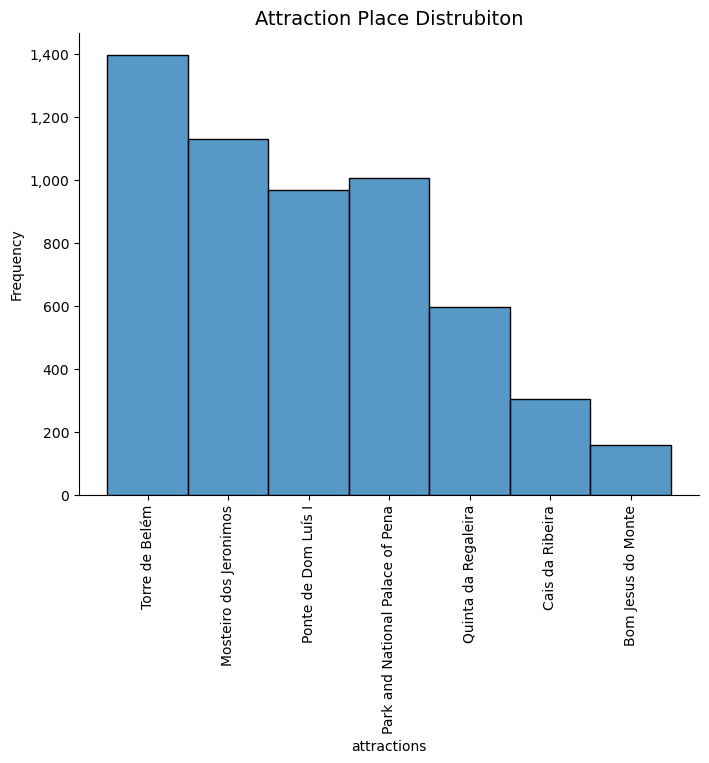

In [47]:
# Check for the Distribution counts of attraction places.

# Draw
fig, ax = plt.subplots(figsize=(8,6))
g = sns.histplot(master_portugal['Name'], bins=10, kde=False)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.title("Attraction Place Distrubiton", fontsize=14)
plt.xlabel("attractions")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=14)

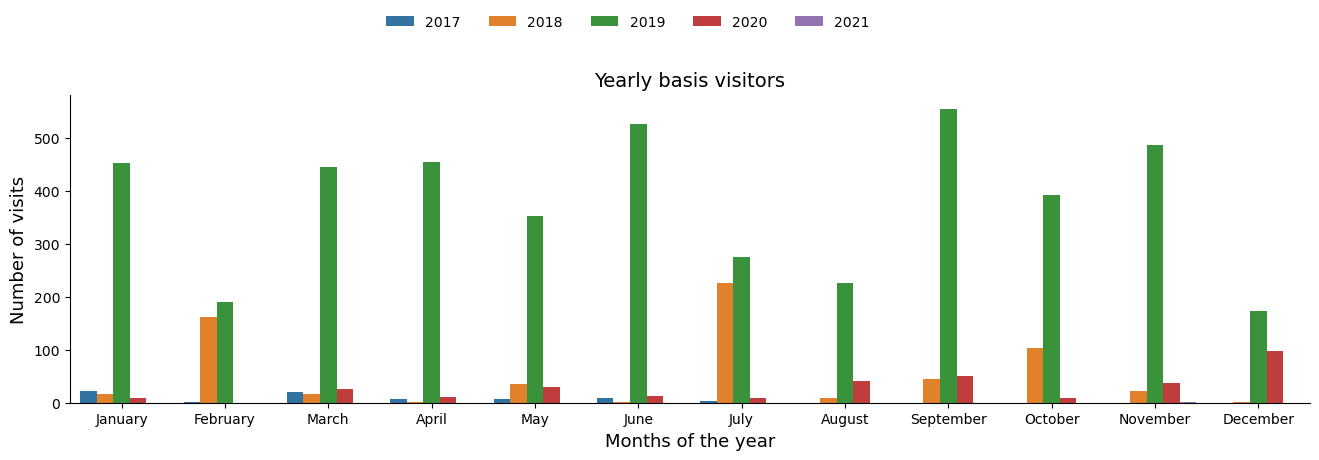

In [49]:
# Draw
fig, ax = plt.subplots(figsize=(16,4))
master_portugal = master_portugal.sort_values(by='visit_year', ascending=False)
ax = sns.countplot(data=master_portugal, x="visit_month", hue="visit_year")

# Sort the data by the month column
master_portugal = master_portugal.sort_values(by='visit_month')

# Convert the numbers on the x-axis into month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(range(0,12), month_names)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Yearly basis visitors", fontsize=14)
plt.xlabel("Months of the year", fontsize=13)
plt.ylabel("Number of visits", fontsize=13)
plt.rc('axes', labelsize=12)
handles, labels = ax.get_legend_handles_labels()
labels.sort()
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=5, bbox_to_anchor=(0.45, 1.30), frameon=False)
plt.savefig('plot.png')

In [204]:
# Yearwise number of visits in Portugese attractions
year_counts = master_portugal['visit_year'].value_counts()
year_counts

visit_year
2019       4520
2020        636
2018        330
2021         70
Unknown       2
2017          1
Name: count, dtype: int64

Here we see in Pre pandemic years (2019,2018,2017), there were 4850 trips. post pandemic years (2021, 2020) it came down to 706 trips only.

2019 is an unusual year as it saw a big boost. We explained the probable reasons in the business understanding part of our report

In [209]:
# Replace Scotland to United Kingdom.
master_cleaned["Country"].replace("Scot", "Scotland", inplace=True)
master_cleaned["Country"].replace("Scotland", "United Kingdom", inplace=True)
master_cleaned["Country"].replace("England", "United Kingdom", inplace=True)

# Remove Curaçao as it's not in Europe region.
master_cleaned.drop(master_cleaned.loc[master_cleaned["Country"] == "Curaçao"].index, inplace=True)

# Group by 'Name' column and aggregate reviewRating metrics we want to see on Bubble Scatter Plot. 
countries_bubble = master_cleaned.groupby('Country').agg({"reviewRating":["size","mean"]}).reset_index()

# Define the columns. 
countries_bubble.columns = ["Country", "reviewRating-size", "reviewRating-mean"]

# Check for columns.
countries_bubble.sort_values('reviewRating-size', ascending=False)

,Country,reviewRating-size,reviewRating-mean
22,United Kingdom,25707,4.513829
20,Spain,22232,4.604624
12,Italy,6864,4.651807
18,Portugal,5559,4.435870
17,Poland,4438,4.609509
8,France,4089,4.442651
0,Austria,3858,4.564541
19,Russia,3667,4.702754
10,Greece,3158,4.707410
3,Croatia,2323,4.612570


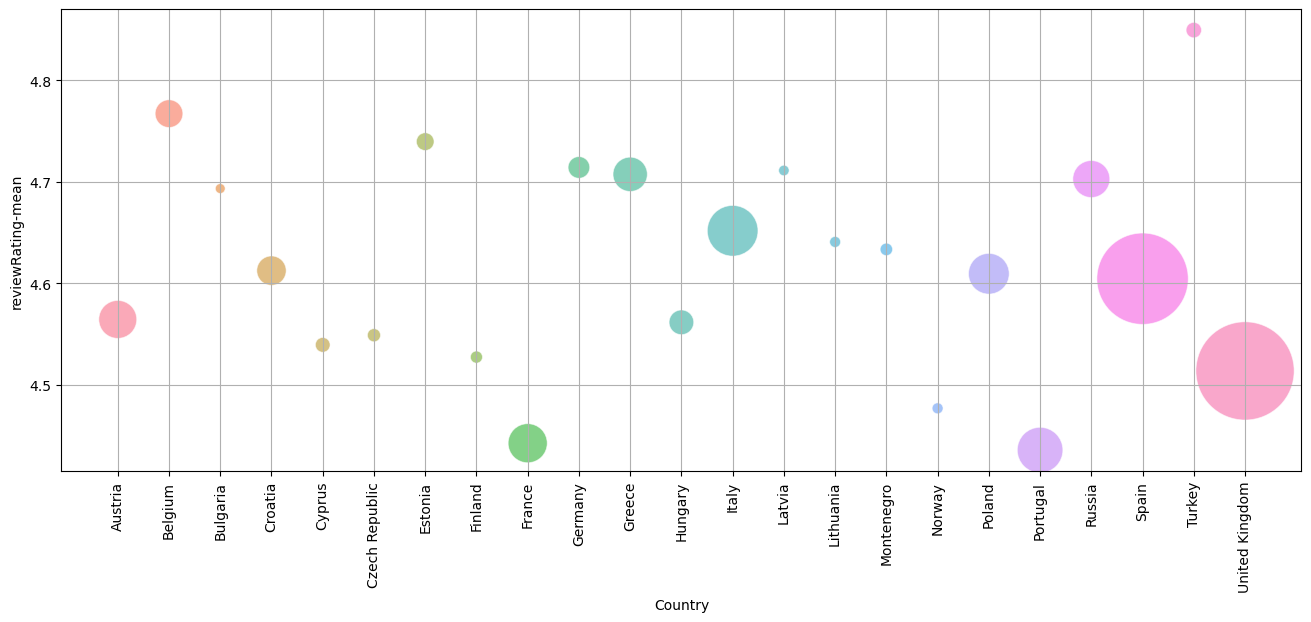

In [210]:
# Draw
plt.figure(figsize=(16,6))
plt.grid()
sns.scatterplot(data=countries_bubble, 
                x="Country", 
                y="reviewRating-mean", 
                hue="Country",  
                size="reviewRating-size", 
                alpha=0.6,legend=False,sizes=(50, 5000))
plt.xticks(rotation=90)
print()

 Looking at this graph, Portugal is competing in the same range with United Kingdom, Spain, France, Italy, Austria and Poland. Please note,  that the rating differs only by decimals. However, we preferred selecting Uk, Spain, Italy in our analysis as Portugal's main competitors for our Data Exploration phase as per the following reference. The top competiton


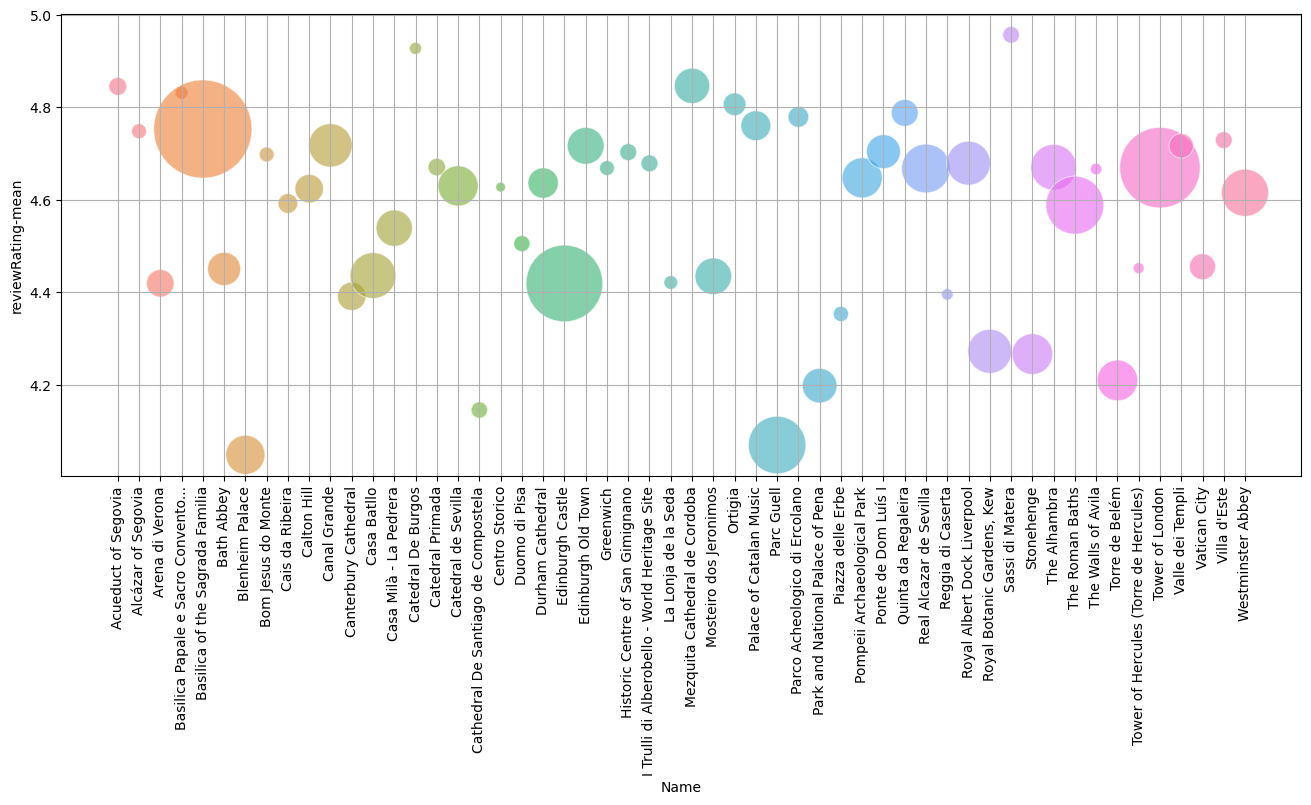

In [211]:
# Analyze competitors' attraction places to compare with Portugal's attractions.
# For that, we included competitor countries in cleaned data. 
countries = ['Portugal', 'Spain', 'Italy', 'United Kingdom']
competitors_countries = master_cleaned[master_cleaned.Country.isin(countries)]

# Group by 'Name' column and aggregate reviewRating metrics we want to see on Bubble Scatter Plot. 
competitors_bubble = competitors_countries.groupby('Name').agg({"reviewRating":["size","mean"]}).reset_index() 

# Define the columns. 
competitors_bubble.columns = ["Name", "reviewRating-size", "reviewRating-mean"]

# Draw
plt.figure(figsize=(16,6))
plt.grid()
sns.scatterplot(data=competitors_bubble, 
                x="Name", 
                y="reviewRating-mean", 
                hue="Name",  
                size="reviewRating-size", 
                alpha=0.6,legend=False,sizes=(50, 5000))
plt.xticks(rotation=90)
print()

# With this graph below, we want to see each attraction in our selected countries in terms of avarage ratings and number of reviews written.

In [54]:
# View.
competitors_bubble.head()

,Name,reviewRating-size,reviewRating-mean
0,Acueduct of Segovia,246,4.845528
1,Alcázar of Segovia,163,4.748466
2,Arena di Verona,625,4.419200
3,Basilica Papale e Sacro Convento...,113,4.831858
4,Basilica of the Sagrada Familia,8257,4.753785


### DATA EXPLORATION - Understanding Visitors of Europe

In [60]:
# Number of reviews written by userLocation countries sorted.
master_cleaned['userLocation_cleaned'].value_counts()[:20].sort_values(ascending=False)

userLocation_cleaned
United Kingdom    27124
United States     18825
Australia          4052
Canada             3111
Spain              1145
Ireland            1102
India              1010
Netherlands         839
Germany             795
France              737
Italy               709
New Zealand         674
Greece              620
Belgium             611
Israel              605
Singapore           571
South Africa        488
Romania             467
Portugal            442
Switzerland         426
Name: count, dtype: int64

First looking at where the visitors have come from in europe

In [212]:
# Check for duplicates
master_cleaned.duplicated().sum()

0

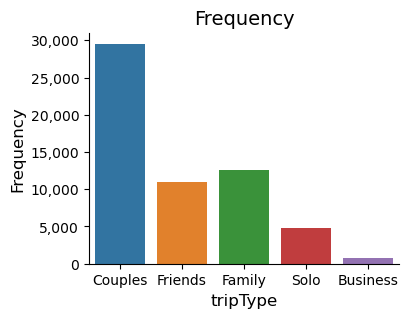

In [66]:
# Trip type

# Draw
fig, ax = plt.subplots(figsize=(4,3))
g = sns.countplot(data=master_cleaned, x=master_cleaned['tripType'])

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Frequency", fontsize=14)
plt.xlabel("tripType")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=12)

Next, understanding what type of trip they take

In [169]:
pt = pd.pivot_table(master_cleaned[['localID', 'tripType']],     # <-- added a comma here
                    index='localID',
                    columns='tripType',
                    aggfunc='size',  # Assuming you want to count occurrences
                    fill_value=0)     # Fill NaN values with 0

pt.head(10)
 

tripType,Business,Couples,Family,Friends,Solo
localID,,,,,
MAG001,61,2901,1339,1138,415
MAG002,11,984,505,451,144
MAG003,50,1532,1447,649,304
MAG004,12,541,263,202,122
MAG007,15,888,379,324,129
MAG008,7,659,231,201,89
MAG009,12,669,222,144,53
MAG010,7,537,155,175,91
MAG011,26,829,452,386,190


In [213]:
# Check User Location cardinality
master_cleaned['localID'].value_counts().head(10)

localID
MAG001    8309
MAG003    5568
MAG006    5060
MAG024    2872
MAG002    2834
MAG011    2669
MAG007    2392
MAG012    2029
MAG022    1895
MAG017    1859
Name: count, dtype: int64

### DATA EXPLORATION - Understanding who visited & reviewed Portugese attractions

In [175]:
# Number of reviews written by userLocation countries sorted.
master_portugal.describe

<bound method NDFrame.describe of       localID                     userName               userLocation  \
29980  MAG010              ehelkur@ehelkur         Abrantes, Portugal   
59751  MAG032                  mokky@mokky       Singapore, Singapore   
37360  MAG014               Meighan C@xxrx                    Rye, NY   
37363  MAG014           Lisa B@lisabX315SA         Mechanicsville, VA   
37364  MAG014          Philip M@921philipm                Atlanta, GA   
...       ...                          ...                        ...   
72410  MAG047              pacaseb@pacaseb      San Juan, Puerto Rico   
59776  MAG032          DeltaDonH@DeltaDonH  Highlands Ranch, Colorado   
30130  MAG010      Antonio8069@Antonio8069            Los Angeles, CA   
59802  MAG032            d0rrie13@d0rrie13              Cambridge, MA   
30111  MAG010  Patricia T@patriciatK8744GT          Washington DC, DC   

      tripType reviewWritten reviewVisited  reviewRating  \
29980      NaN    2020-02-20 

In [178]:
# Filter and display Portugal data.
Portugal = master_cleaned.loc[master_cleaned["Country"]=="Portugal"]
Portugal.head()

,localID,userName,userLocation,tripType,reviewWritten,reviewVisited,reviewRating,Name,Country,visit_year,visit_month,userLocation_cleaned
29827,MAG010,Barbs25@Barbs25,"Staffordshire, UK",Friends,2021-08-11,2021-07-01,3,Torre de Belém,Portugal,2021,07,United Kingdom
29828,MAG010,WWH47@WWH47,"Baton Rouge, LA",NaN,2021-08-02,2021-07-01,5,Torre de Belém,Portugal,2021,07,United States
29829,MAG010,Runawayblond@runawayblond,"Chicago, IL",Solo,2021-07-26,2021-06-01,4,Torre de Belém,Portugal,2021,06,United States
29830,MAG010,Darren H@DarrenHumphrey,"Orlando, FL",NaN,2021-07-24,2021-06-01,5,Torre de Belém,Portugal,2021,06,United States
29831,MAG010,Kevin S@kevins684,"Pontypridd, UK",NaN,2021-07-23,2021-07-01,4,Torre de Belém,Portugal,2021,07,United Kingdom


In [171]:
# Check Trip Type cardinality of all visitors of Portugal
master_portugal['tripType'].value_counts()

tripType
Couples     2099
Friends      702
Family       633
Solo         341
Business      30
Name: count, dtype: int64

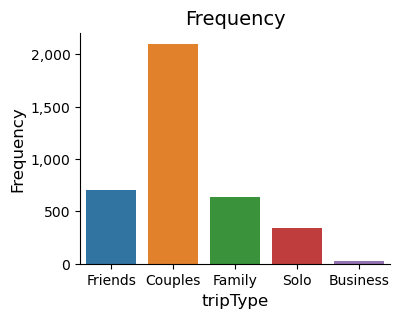

In [172]:
# Trip type of Portugal visitors

# Draw
fig, ax = plt.subplots(figsize=(4,3))
g = sns.countplot(data=master_portugal, x=master_portugal['tripType'])

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Frequency", fontsize=14)
plt.xlabel("tripType")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=12)

In [176]:
# Check Attraction Name cardinality of all visitors of Portugal
master_portugal['Name'].value_counts()

Name
Torre de Belém                      1397
Mosteiro dos Jeronimos              1130
Park and National Palace of Pena    1005
Ponte de Dom Luís I                  967
Quinta da Regaleira                  595
Cais da Ribeira                      304
Bom Jesus do Monte                   159
Name: count, dtype: int64

In [177]:
pt = pd.pivot_table(master_portugal[['localID', 'tripType']],     # <-- added a comma here
                    index='localID',
                    columns='tripType',
                    aggfunc='size',  # Assuming you want to count occurrences
                    fill_value=0)     # Fill NaN values with 0

pt.head(10)

tripType,Business,Couples,Family,Friends,Solo
localID,,,,,
MAG010,7,537,155,175,91
MAG014,6,412,125,143,67
MAG021,6,367,93,108,70
MAG032,4,368,137,138,54
MAG047,3,219,82,80,28
MAG049,2,139,28,42,17
MAG093,2,57,13,16,14


In [179]:
# Group the Portugal dataframe by tripType, calculate the size and mean of the reviewRating column for each group, and sort the resulting dataframe by size of the group in descending order.
visitors_type_Portugal=Portugal.groupby('tripType').agg({"reviewRating":["size","mean"]}).reset_index()
visitors_type_Portugal.columns = ["tripType", "reviewRating-size", "reviewRating-mean"]
visitors_type_Portugal.sort_values('reviewRating-size', ascending=False)

,tripType,reviewRating-size,reviewRating-mean
1,Couples,2099,4.412577
3,Friends,702,4.427350
2,Family,633,4.453397
4,Solo,341,4.498534
0,Business,30,4.700000


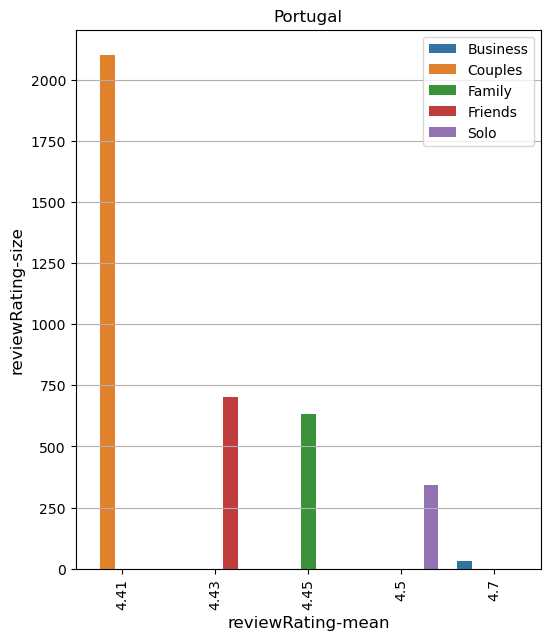

In [180]:
# Round the reviewRating-mean column of the visitors_type_Portugal dataframe to 2 decimal places, create a bar plot using seaborn to show the relationship between reviewRating-mean and reviewRating-size grouped by tripType in the Portugal dataframe, and display the plot.
visitors_type_Portugal["reviewRating-mean"] = visitors_type_Portugal["reviewRating-mean"].round(2)

plt.figure(figsize=(6, 7))
plt.title("Portugal")
plt.grid()
sns.barplot(data=visitors_type_Portugal, x="reviewRating-mean", y="reviewRating-size", hue="tripType", alpha=1)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
print()

# MODELING

# Competition Analysis - Distance Matrix

Merging Master_cleaned and holidays

In [218]:
countries_h = list(holidays['countryOrRegion'].drop_duplicates())
countries_h.sort(key=len, reverse=True)
regex_ch = "({})".format("|".join(countries_h))

In [219]:
master_cleaned['userCountry'] = master_cleaned['userLocation'].str.extract(regex_ch)[0].str.lower()

In [220]:

visit = master_cleaned[['userCountry','reviewVisited','reviewWritten']].drop_duplicates().reset_index(drop=True)

In [228]:

visit['n_holidays'] = np.nan

In [224]:
master_cleaned = master_cleaned.merge(visit, left_on=['userCountry','reviewWritten','reviewVisited'] , right_on=['userCountry','reviewWritten','reviewVisited'], how='left')


In [225]:


master_cleaned['Country'] = master_cleaned['Country'].str.title().str.replace('England', 'United Kingdom')

master_cleaned = master_cleaned.drop(columns='userCountry')



In [227]:
master_cleaned.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
index,91679.0,NaN,NaN,NaN,45868.509866,0.0,22929.5,45859.0,68778.5,92119.0,26499.800214
localID,91679,99,MAG001,8309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userName,91679,65429,Malgorzata@Margo7850p,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,91679,30,unknown,79722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tripType,91679,6,Couples,31553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviewWritten,91679,NaN,NaN,NaN,2019-09-02 17:25:26.443351296,2019-01-01 00:00:00,2019-05-11 00:00:00,2019-08-07 00:00:00,2019-11-05 00:00:00,2021-08-21 00:00:00,NaN
reviewVisited,91679,58,2019-09-01,8485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviewRating,91679.0,NaN,NaN,NaN,4.578289,1.0,4.0,5.0,5.0,5.0,0.793606
Name,91679,98,Basilica of the Sagrada Familia,8309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,91679,23,United Kingdom,25707,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis of the Holidays

In [230]:
#Create a variable with the holidays within one civil year

Holidays_date=holidays[holidays['date'].dt.year==2020]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


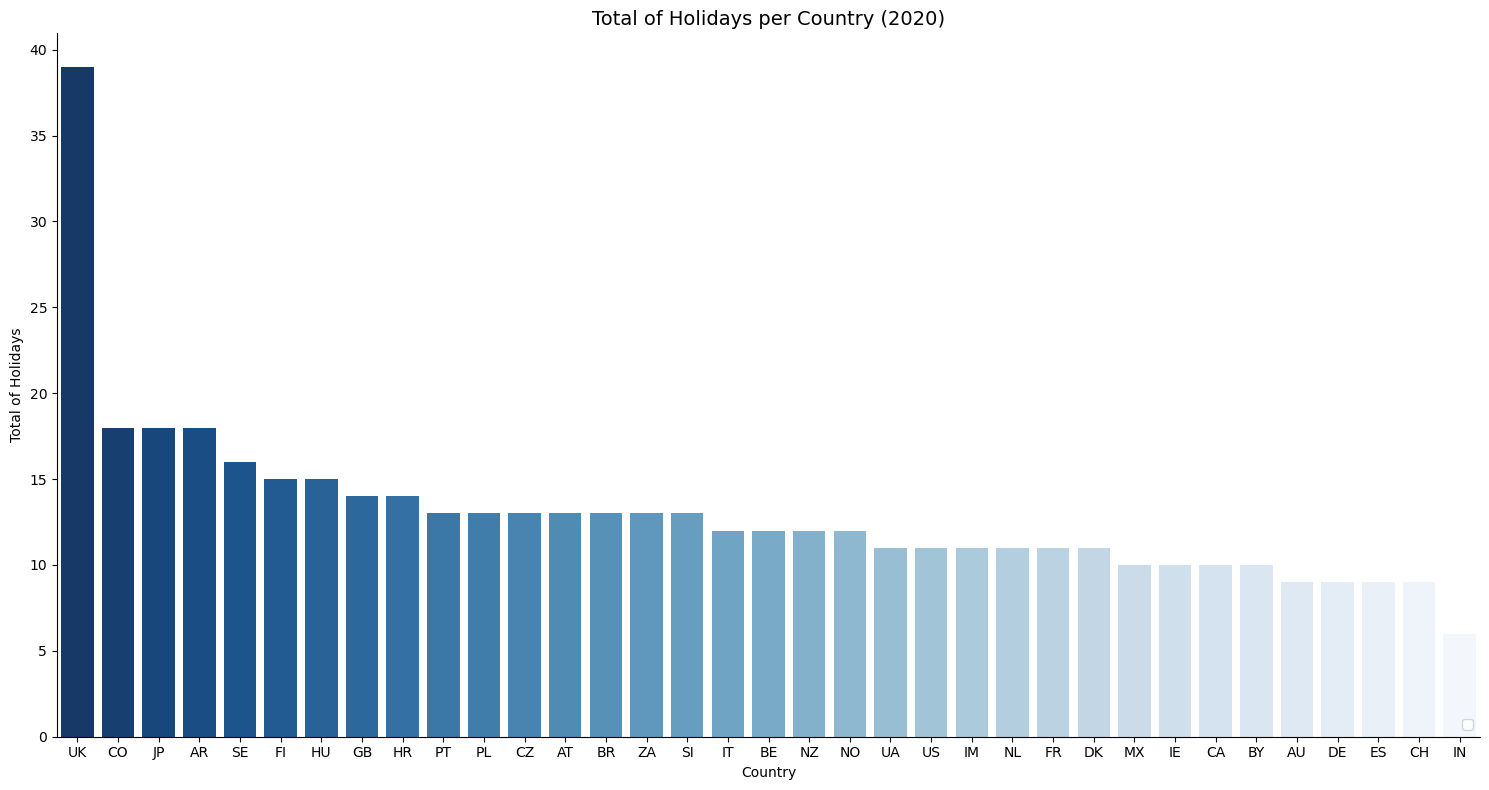

In [232]:
import matplotlib.ticker as mtick
from matplotlib import ticker

%matplotlib inline

fig, ax = plt.subplots(figsize=(15,8))
g = sns.countplot(data=holidays, x=Holidays_date['ISO'], palette="Blues_r",order=Holidays_date['ISO'].value_counts().index)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
hue='d_pt'
plt.title("Total of Holidays per Country (2020)", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Total of Holidays")
plt.rc('axes', labelsize=12)
l = plt.legend(loc=4)
plt.tight_layout()

#fig.savefig(fname=exportsFolder + 'Holidays per Country (2020)', bbox_inches="tight")

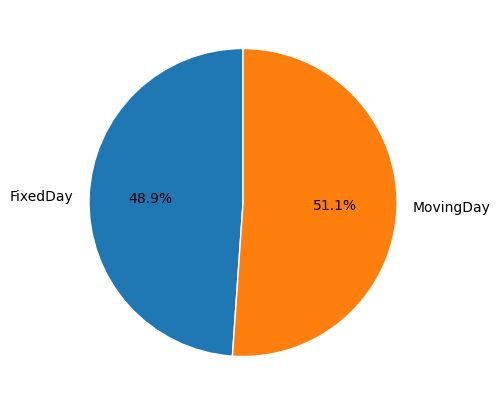

In [234]:
# Aggregate the information
tempTypeHol = holidays.groupby('TypeHoliday').agg('count')


fig, ax = plt.subplots(figsize=(8,5))
ax.pie(tempTypeHol.HolidayName.to_list(), labels=tempTypeHol.index.to_list(),wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
        autopct='%1.1f%%', startangle=90);

#fig.savefig(fname=exportsFolder + 'Moving VS Fixed Holidays', bbox_inches="tight")

# Analysis of the Attractions

In [237]:
PTcompet = pd.pivot_table(
    master_cleaned[['userName', 'Name']],
    index='userName',  
    columns='Name',  
    aggfunc=(lambda x: 1 if len(x) > 0 else 0)).fillna(0)

print(PTcompet.shape)
PTcompet.head(15)

(65429, 98)


Name,Abbaye du Mont-Saint-Michel,Acropolis,Acueduct of Segovia,Alcázar of Segovia,Ancient City of Ephesus,Arena di Verona,Basilica Papale e Sacro Convento...,Basilica of the Sagrada Familia,Bath Abbey,Blenheim Palace,...,Torre de Belém,Tower of Hercules (Torre de Hercules),Tower of London,Valle dei Templi,Vatican City,Vieux Lyon,Villa d'Este,Vilnius Old Town,Westminster Abbey,Wieliczka Salt Mine
userName,,,,,,,,,,,,,,,,,,,,,
#1 Best@Number1Best,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Ciccone@932emzc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Travelendlessbeauty@travelendlessbeauty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#moving mountains@peaceat28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
#taxi de Barcelona #taxi#aeropuer@cavataxi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#travelswithhugodog@ajotraveller2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&Y B@CopCop83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Tis Me@DrSuess2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--Isma-1010@--Isma-1010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [249]:
attractions = PTcompet.to_numpy().T
distMatrix = pairwise_distances(attractions, metric='dice')
DistMatrixDF = pd.DataFrame(distMatrix,
                             columns=PTcompet.columns,
                             index=PTcompet.columns)
DistMatrixDF = DistMatrixDF.apply(
    lambda x: 1 - x, axis=1)
DistMatrixDF

C:\Users\Laptop Index\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2181: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


Name,Abbaye du Mont-Saint-Michel,Acropolis,Acueduct of Segovia,Alcázar of Segovia,Ancient City of Ephesus,Arena di Verona,Basilica Papale e Sacro Convento...,Basilica of the Sagrada Familia,Bath Abbey,Blenheim Palace,...,Torre de Belém,Tower of Hercules (Torre de Hercules),Tower of London,Valle dei Templi,Vatican City,Vieux Lyon,Villa d'Este,Vilnius Old Town,Westminster Abbey,Wieliczka Salt Mine
Name,,,,,,,,,,,,,,,,,,,,,
Abbaye du Mont-Saint-Michel,1.000000,0.002802,0.002882,0.003328,0.007398,0.000000,0.003630,0.002161,0.000000,0.000000,...,0.005731,0.000000,0.004073,0.002172,0.002092,0.000000,0.003247,0.000000,0.006934,0.001440
Acropolis,0.002802,1.000000,0.002262,0.002344,0.013718,0.002657,0.002390,0.008941,0.003123,0.002858,...,0.005400,0.000000,0.008152,0.001389,0.008919,0.000782,0.001553,0.005100,0.004525,0.001792
Acueduct of Segovia,0.002882,0.002262,1.000000,0.561404,0.000000,0.000000,0.000000,0.007873,0.000000,0.000000,...,0.019443,0.006472,0.001154,0.011127,0.007958,0.000000,0.000000,0.003425,0.003302,0.003370
Alcázar of Segovia,0.003328,0.002344,0.561404,1.000000,0.000000,0.000000,0.000000,0.005226,0.000000,0.000000,...,0.013793,0.009259,0.000783,0.006390,0.006051,0.000000,0.000000,0.004073,0.002320,0.005484
Ancient City of Ephesus,0.007398,0.013718,0.000000,0.000000,1.000000,0.002068,0.004292,0.000485,0.003454,0.001375,...,0.003614,0.004695,0.001129,0.002392,0.000000,0.000000,0.000000,0.000000,0.002068,0.003067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vieux Lyon,0.000000,0.000782,0.000000,0.000000,0.000000,0.005305,0.000000,0.001743,0.002116,0.001610,...,0.001382,0.000000,0.001176,0.003210,0.000000,1.000000,0.006289,0.000000,0.000000,0.001833
Villa d'Este,0.003247,0.001553,0.000000,0.000000,0.000000,0.005181,0.007380,0.000994,0.000000,0.000000,...,0.006826,0.008658,0.001172,0.009360,0.008876,0.006289,1.000000,0.000000,0.001150,0.000000
Vilnius Old Town,0.000000,0.005100,0.003425,0.004073,0.000000,0.000000,0.000000,0.001703,0.000000,0.000000,...,0.003670,0.004988,0.001134,0.007398,0.007092,0.000000,0.000000,1.000000,0.001048,0.003127


In [268]:

# Replace 'YourAttraction' with the attraction you are interested in
target_attraction = 'Torre de Belém'

# Sort the distances for the target attraction
sorted_distances = DistMatrixDF[target_attraction].sort_values()

# Get the top N similar attractions (excluding the target attraction itself)
top_similar_attractions = sorted_distances.index[1:5+1]
print(top_similar_attractions)

Top 5 attractions similar to Torre de Belém:
Index(['Reggia di Caserta', 'Duomo di Pisa', 'Salzburger Altstadt',
       'Sea Fortress Suomenlinna', 'Centro Storico'],
      dtype='object', name='Name')


In [287]:
# List of top portugese attractions
attractions_of_interest = ['Torre de Belém', 'Mosteiro dos Jeronimos','Ponte de Dom Luís I','Park and National Palace of Pena','Quinta da Regaleira','Cais da Ribeira','Bom Jesus do Monte']

# Number of top similar attractions to retrieve
N = 5

# Dictionary to store top similar attractions for each attraction
top_similar_dict = {}

# Loop through each attraction
for target_attraction in attractions_of_interest:
    # Sort the distances for the target attraction
    sorted_distances = DistMatrixDF[target_attraction].sort_values()
    
    # Get the top N similar attractions (excluding the target attraction itself)
    top_similar_attractions = sorted_distances.index[1:N+1].tolist()
    
    # Store the results in the dictionary
    top_similar_dict[target_attraction] = top_similar_attractions
    
# Convert the dictionary to a DataFrame
result_df = pd.DataFrame.from_dict(top_similar_dict, orient='index')

# Display the results
for attraction, top_similar_attractions in top_similar_dict.items():
    print(f"Top {N} attractions similar to {attraction}:")
    print(top_similar_attractions)
    print()

Top 5 attractions similar to Torre de Belém:
['Reggia di Caserta', 'Duomo di Pisa', 'Salzburger Altstadt', 'Sea Fortress Suomenlinna', 'Centro Storico']

Top 5 attractions similar to Mosteiro dos Jeronimos:
["Villa d'Este", 'Vieux Lyon', 'Duomo di Pisa', 'Centro Storico', 'Place Stanislas']

Top 5 attractions similar to Ponte de Dom Luís I:
['The Walls of Avila', 'La Petite France', 'Cathedrale Notre-Dame de Reims', 'Centro Storico', 'Old Nessebar']

Top 5 attractions similar to Park and National Palace of Pena:
['Old Nessebar', 'Vieux Lyon', 'I Trulli di Alberobello - World Heritage Site', 'Historic Areas of Istanbul', 'Piazza delle Erbe']

Top 5 attractions similar to Quinta da Regaleira:
['Grand Peterhof Palace', 'Greenwich', 'Historic Center of Vienna', 'I Trulli di Alberobello - World Heritage Site', 'Kato Paphos Archaeological Park']

Top 5 attractions similar to Cais da Ribeira:
['Place Stanislas', 'Cathedrale Notre-Dame de Reims', 'Centro Storico', 'The Walls of Avila', 'Cologn

In [288]:
result_df.T

,Torre de Belém,Mosteiro dos Jeronimos,Ponte de Dom Luís I,Park and National Palace of Pena,Quinta da Regaleira,Cais da Ribeira,Bom Jesus do Monte
0,Reggia di Caserta,Villa d'Este,The Walls of Avila,Old Nessebar,Grand Peterhof Palace,Place Stanislas,Duomo di Pisa
1,Duomo di Pisa,Vieux Lyon,La Petite France,Vieux Lyon,Greenwich,Cathedrale Notre-Dame de Reims,Durham Cathedral
2,Salzburger Altstadt,Duomo di Pisa,Cathedrale Notre-Dame de Reims,I Trulli di Alberobello - World Heritage Site,Historic Center of Vienna,Centro Storico,Edinburgh Old Town
3,Sea Fortress Suomenlinna,Centro Storico,Centro Storico,Historic Areas of Istanbul,I Trulli di Alberobello - World Heritage Site,The Walls of Avila,Palais des Papes
4,Centro Storico,Place Stanislas,Old Nessebar,Piazza delle Erbe,Kato Paphos Archaeological Park,Cologne Cathedral,Pont du Gard




It is also clear that Spain is our top competito